In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string  
import nltk
import scipy
import math
import numpy as np
import seaborn as sns
from joblib import dump
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import cess_esp
nltk.download('cess_esp')
from nltk.corpus import wordnet
import pickle as pkl
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to

In [2]:
# Creating a pandas dataframe from reviews.txt file
df_tracks=pd.read_csv('MovieReviews.csv', sep=',', encoding = 'utf-8')
df_tracks.head()

,Unnamed: 0,review_es,sentimiento
0,0,Si está buscando una película de guerra típica...,positivo
1,1,Supongo que algunos directores de películas de...,positivo
2,2,Es difícil contarle más sobre esta película si...,positivo
3,3,"La película comienza muy lentamente, con el es...",positivo
4,4,Esta película es verdadera acción en su máxima...,positivo


In [3]:
df_tracks.info

<bound method DataFrame.info of       Unnamed: 0                                          review_es  \
0              0  Si está buscando una película de guerra típica...   
1              1  Supongo que algunos directores de películas de...   
2              2  Es difícil contarle más sobre esta película si...   
3              3  La película comienza muy lentamente, con el es...   
4              4  Esta película es verdadera acción en su máxima...   
...          ...                                                ...   
4995        4995  "Criminal decente ordinario" es triste porque ...   
4996        4996  Savage Island (2003) es una película coja.Es m...   
4997        4997  Quien escribió el script para esta película no...   
4998        4998  in a TV-movie 70's kind of way It's one of tho...   
4999        4999  Película decepcionante, predecible en la que u...   

     sentimiento  
0       positivo  
1       positivo  
2       positivo  
3       positivo  
4       positivo  
.

# Analisis de Datos


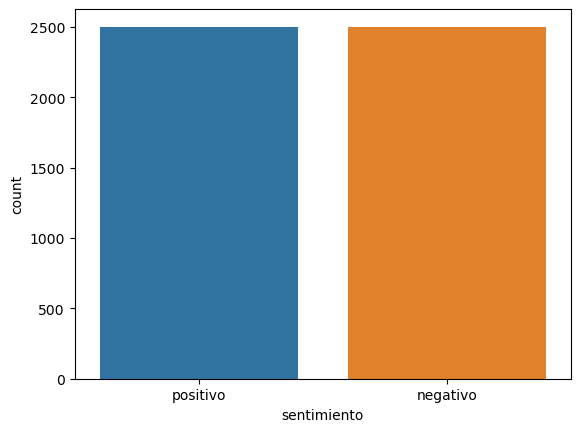

In [4]:
count = sns.countplot(data=df_tracks, x='sentimiento', order=df_tracks['sentimiento'].value_counts().index)
plt.show()

In [5]:
def label_to_number(label):
    if label == "positivo":
        return 1
    else:
        return 0
df_tracks['label'] = df_tracks['sentimiento'].apply(label_to_number)
df_tracks.head()


,Unnamed: 0,review_es,sentimiento,label
0,0,Si está buscando una película de guerra típica...,positivo,1
1,1,Supongo que algunos directores de películas de...,positivo,1
2,2,Es difícil contarle más sobre esta película si...,positivo,1
3,3,"La película comienza muy lentamente, con el es...",positivo,1
4,4,Esta película es verdadera acción en su máxima...,positivo,1


In [6]:
df_tracks.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,2499.5,1443.520003,0.0,1249.75,2499.5,3749.25,4999.0
label,5000.0,0.5,0.500050,0.0,0.00,0.5,1.00,1.0


In [7]:
df_tracks['label']

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: label, Length: 5000, dtype: int64

# Limpieza, Tokens y Lematizacion


In [8]:
def clean_text(text):
    """
    Limpia el texto eliminando signos de puntuación, números y palabras vacías.
    """
    text = text.lower() # Convertir todo el texto a minúsculas
    text = re.sub('\[.*?\]', '', text) # Eliminar cualquier cosa entre corchetes
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Eliminar signos de puntuación
    text = re.sub('\w*\d\w*', '', text) # Eliminar cualquier número
    text = re.sub('[‘’“”…]', '', text) # Eliminar comillas
    text = re.sub('\n', '', text) # Eliminar saltos de línea
    return text
df_tracks['Clean Review'] = df_tracks['review_es'].apply(clean_text)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label,Clean Review
0,0,Si está buscando una película de guerra típica...,positivo,1,si está buscando una película de guerra típica...
1,1,Supongo que algunos directores de películas de...,positivo,1,supongo que algunos directores de películas de...
2,2,Es difícil contarle más sobre esta película si...,positivo,1,es difícil contarle más sobre esta película si...
3,3,"La película comienza muy lentamente, con el es...",positivo,1,la película comienza muy lentamente con el est...
4,4,Esta película es verdadera acción en su máxima...,positivo,1,esta película es verdadera acción en su máxima...


In [9]:
def remove_stopwords(text):
    """
    Elimina las palabras vacías del texto.
    """
    stop_words = set(stopwords.words('spanish'))
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df_tracks['Clean Review'] = df_tracks['Clean Review'].apply(remove_stopwords)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label,Clean Review
0,0,Si está buscando una película de guerra típica...,positivo,1,si buscando película guerra típica así nota af...
1,1,Supongo que algunos directores de películas de...,positivo,1,supongo directores películas lujo sentados bus...
2,2,Es difícil contarle más sobre esta película si...,positivo,1,difícil contarle película estropearlalo disfru...
3,3,"La película comienza muy lentamente, con el es...",positivo,1,película comienza lentamente estilo vida walla...
4,4,Esta película es verdadera acción en su máxima...,positivo,1,película verdadera acción máxima expresión mej...


In [10]:
def tokenize_text(text):
    """
    Tokeniza el texto.
    """
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

#df_tracks['Clean Review'] = df_tracks['Clean Review'].apply(tokenize_text)
#df_tracks.head()

In [11]:
def snowball_lemmatize(text):
    stemmer = SnowballStemmer(language='english')
    tokens = word_tokenize(text)
    lemmatized_text = [stemmer.stem(token) for token in tokens]
    return ' '.join(lemmatized_text)

df_tracks['Clean Review'] = df_tracks['Clean Review'].apply(snowball_lemmatize)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label,Clean Review
0,0,Si está buscando una película de guerra típica...,positivo,1,si buscando película guerra típica así nota af...
1,1,Supongo que algunos directores de películas de...,positivo,1,supongo director película lujo sentado buscand...
2,2,Es difícil contarle más sobre esta película si...,positivo,1,difícil contarl película estropearlalo disfrut...
3,3,"La película comienza muy lentamente, con el es...",positivo,1,película comienza lentament estilo vida wallac...
4,4,Esta película es verdadera acción en su máxima...,positivo,1,película verdadera acción máxima expresión mej...


In [12]:
def lematizar_lista_textos(textos):
    """
    Esta función toma una lista de textos en español como entrada y devuelve una lista de listas de palabras lematizadas
    """
    stemmer = SnowballStemmer('spanish')
    lemas = []
    for texto in textos:
        lemas_texto = stemmer.stem(texto) 
        lemas.append(lemas_texto)
    return lemas



# Preparacion Datos

In [13]:
vectorizer = TfidfVectorizer(max_df=1200, min_df=2, max_features=10000, ngram_range=(1,2))
X_count = vectorizer.fit_transform(df_tracks['Clean Review'])
print(X_count.shape)
#cambio = [' '.join(doc)  for doc in df_tracks['Clean Review']]
#print(cambio)

(5000, 10000)


In [14]:
#X = vectorizer.fit_transform(cambio)
#X_prueba=vectorizer.fit_transform(X_prueba)

y = df_tracks['label']



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Aplicacion del metodo SVM Linear


In [16]:
svm = LinearSVC()
svc_classifier=svm.fit(X_train, y_train)

In [17]:
y_train_svm_predict = svm.predict(X_train)
y_test_svm_predict = svm.predict(X_test)

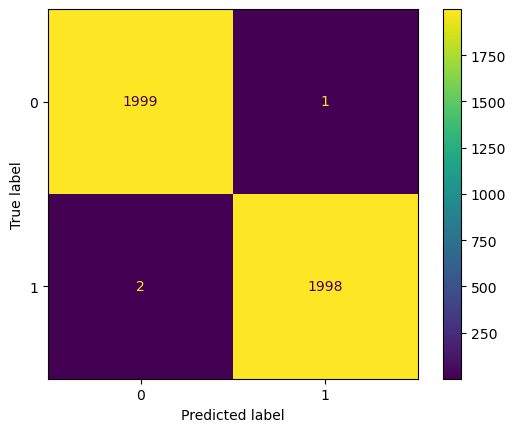

In [18]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

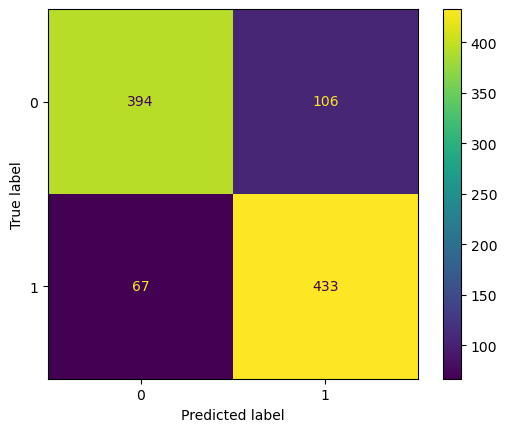

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [20]:
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('model', svm)
])


In [21]:
rutaPipeline =  "pipeline.pkl"
with open(rutaPipeline, 'wb') as file:
    pkl.dump(pipeline, file)

In [22]:
svc_y_pred=svc_classifier.predict(X_test)
svc_cm=confusion_matrix(y_test,svc_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_precision = precision_score(y_test, svc_y_pred)
svc_recall = recall_score(y_test, svc_y_pred)
svc_f1_score = f1_score(y_test, svc_y_pred)

In [23]:
print("Accuracy of Support-Vector-Machine is {}%".format(math.floor(svc_accuracy*100)))
print("Precision of Support-Vector-Machine is {}%".format(math.floor(svc_precision*100)))
print("Recall of Support-Vector-Machine is {}%".format(math.floor(svc_recall*100)))
print("F1_score of Support-Vector-Machine is {}%".format(math.floor(svc_f1_score*100)))

Accuracy of Support-Vector-Machine is 82%
Precision of Support-Vector-Machine is 80%
Recall of Support-Vector-Machine is 86%
F1_score of Support-Vector-Machine is 83%
